## CE9010: Introduction to Data Science
## Semester 2 2017/18
## Xavier Bresson
<hr>

## Tutorial 5: Supervised classification - improving capacity learning
## Objectives
### $\bullet$ Code linear and higher-order logistic regression models
### $\bullet$ Explore results
<hr>

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1.1 Load dataset #1
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$. <br>
The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.<br>
Hint: You may use matplotlib function `scatter(x,y)`.

Number of training data= 1000
[[ 0.83159 -0.33906  0.     ]
 [ 0.87196  0.24418  0.     ]
 [ 1.01934  0.23241  0.     ]
 [ 1.09207  0.39539  0.     ]
 [ 1.2249   0.20577  0.     ]
 [ 0.73857  0.2535   0.     ]
 [ 1.31868  0.14831  0.     ]
 [ 0.97316  0.27317  0.     ]
 [ 0.98258  0.42117  0.     ]
 [ 0.62744  0.31469  0.     ]]
(1000, 3)
float64


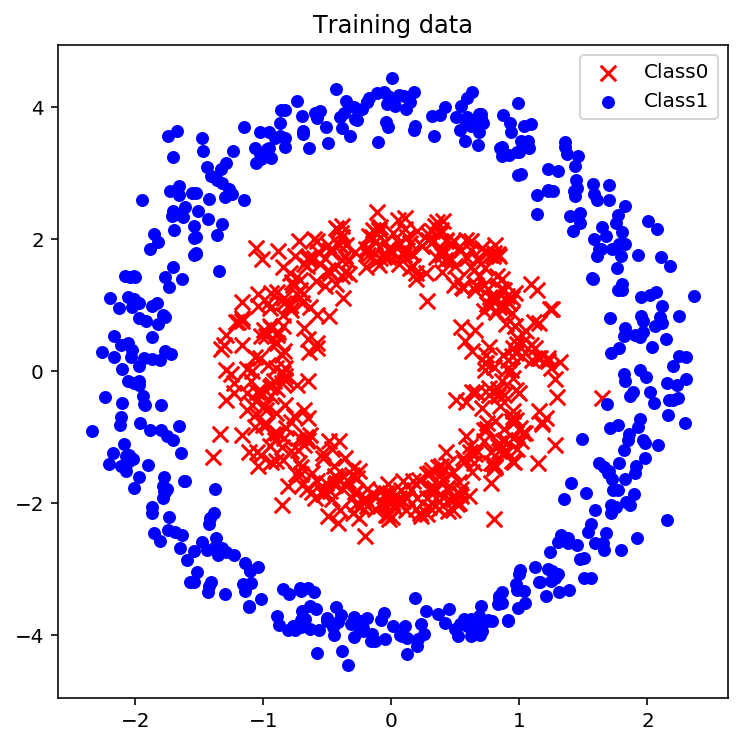

In [8]:
# import data with numpy
data = np.loadtxt('data/two_circles.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of training data=',n)

# print
print(data[:10,:])
print(data.shape)
print(data.dtype)

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx_class0 = (data[:,2]==0) # index of class0
idx_class1 = (data[:,2]==1) # index of class1

plt.figure(1,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='x', linewidths=1, label='Class0')
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', linewidths=1, label='Class1')
plt.title('Training data')
plt.legend()
plt.show()

## 1.2 Linear logistic regression/classification task.
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

In the case of **linear** prediction, we have:

<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

Implement the linear logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.693. <br>

In [12]:
#YOUR CODE HERE

# construct the data matrix X
n = data.shape[0]
X = np.ones([n,3]) 
X[:,1:3] = data[:,0:2]

# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) 
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w)) 
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = -1/n* ( y.T.dot(np.log(y_pred)) + (1-y).T.dot(np.log(1-y_pred)) ) 
    return loss


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = 2/n* X.T.dot(y_pred-y) 
    return grad

start = time.time()
logreg_sklearn = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn.fit(data[:,0:2], data[:,2]) # learn the model parameters #YOUR CODE HERE
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([3,1])
w_sklearn[0,0] = logreg_sklearn.intercept_
w_sklearn[1:3,0] = logreg_sklearn.coef_
print(w_sklearn)
loss_sklearn = loss_logreg(f_pred(X,w_sklearn),data[:,2][:,None])
print('loss sklearn =',loss_sklearn)

Time= 0.0017631053924560547
[[ 2.30426498e-05]
 [-3.45143509e-03]
 [-3.34563631e-04]]
loss sklearn = [[0.6931452]]


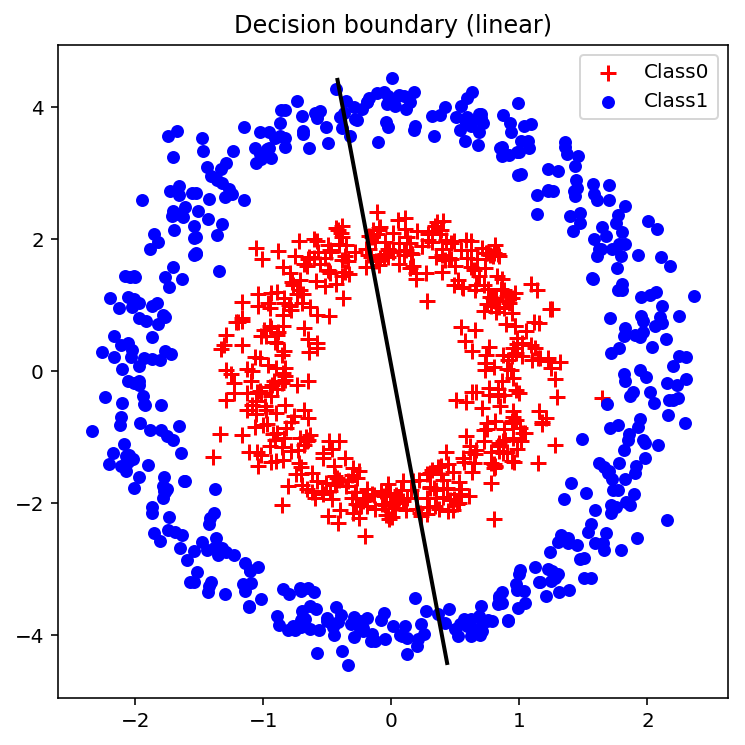

In [11]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w_sklearn)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()


## 1.3 Quadratic logistic regression/classification task.
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

In the case of **quadratic** prediction, we have:

<br>
$$
X = 
\left[ 
\begin{array}{cccccc}
1 & x_{1(1)} & x_{1(2)} & x_{1(1)}^2 & x_{1(2)}^2 & x_{1(1)}x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} & x_{2(1)}^2 & x_{2(2)}^2 & x_{2(1)}x_{2(2)}\\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} & x_{n(1)}^2 & x_{n(2)}^2 & x_{n(1)}x_{n(2)}
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2\\ 
w_3\\ 
w_4\\ 
w_5
\end{array} 
\right]
\quad
$$

Implement the quadratic logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.011. <br>

In [ ]:
#x1(1) and x1(2) given, quadratic can be calculated from them
#YOUR CODE HERE

## 2.1 Load dataset #2
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$. <br>
The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.<br>
Hint: You may use matplotlib function `scatter(x,y)`.

In [ ]:
# import data with numpy
data = np.loadtxt('data/two_moons.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of training data=',n)

# print
print(data[:10,:])
print(data.shape)
print(data.dtype)

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx_class0 = (data[:,2]==0) # index of class0
idx_class1 = (data[:,2]==1) # index of class1

plt.figure(1,figsize=(6,6))
plt.#YOUR CODE HERE
plt.#YOUR CODE HERE
plt.title('Training data')
plt.legend()
plt.show()

## 2.2 Linear logistic regression/classification task.
<hr>


Implement the linear logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.255. <br>

In [ ]:
#YOUR CODE HERE

## 2.3 Quadratic logistic regression/classification task.
<hr>


Implement the quadratic logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.255. <br>

In [ ]:
#YOUR CODE HERE

## 2.4 Cubic logistic regression/classification task.
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

In the case of **cubic** prediction, we have:

<br>
$$
X = 
\left[ 
\begin{array}{cccccccc}
1 & x_{1(1)} & x_{1(2)} & x_{1(1)}^2 & x_{1(2)}^2 & x_{1(1)}x_{1(2)} & x_{1(2)}^3 & x_{1(2)}^3 & x_{1(1)}^2x_{1(2)} & x_{1(1)}x_{1(2)}^2 \\ 
1 & x_{2(1)} & x_{2(2)} & x_{2(1)}^2 & x_{2(2)}^2 & x_{2(1)}x_{2(2)} & x_{2(2)}^3 & x_{2(2)}^3 & x_{2(1)}^2x_{2(2)} & x_{2(1)}x_{2(2)}^2\\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} & x_{n(1)}^2 & x_{n(2)}^2 & x_{n(1)}x_{n(2)} & x_{n(2)}^3 & x_{n(2)}^3 & x_{n(1)}^2x_{n(2)} & x_{n(1)}x_{n(2)}^2
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2\\ 
w_3\\ 
w_4\\ 
w_5\\ 
w_6\\ 
w_7\\ 
w_8\\ 
w_9
\end{array} 
\right]
\quad
$$

Implement the cubic logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.043. <br>

In [ ]:
#YOUR CODE HERE